In [ ]:
#This Code and Text is for CPE 695: Homework 1
#Ronnie Ankner 2/2/2019
#I Pledge my honor that I have abided by the Stevens Honor System

# Question 1

## Supervised Learning
Supervised learning is when the training data contains the correct solution to a given example, whether it be labelled data or a proper reaction given a certain situation.

## Unsupervised Learning
Unsupervised learning is the opposite from supervised, where the data does not have an associated correct solution and the computer must group and classify on it's own.

## Online Learning
Online learning is when a full dataset is not provided, but instead data comes in continuous small chunks as the program runs and the model is refined over time.

## Batch Learning
Batch learning is the opposite of online learning where the full data set is provided at once and once the system is deployed, it does not react to new data, unless the developer chooses to retrain it with an updated dataset containing both the old and new data. 

## Model-based Learning
Model-based learning occurs when the developer defines certain parameters and relations with which the system then refines based on the data. The the model it produces fits the data as best as possible and is used to predict on new data once deployed.

## Instance Based Learning
Instance based learning occurs when the system classifies or reacts based on how similar a new sample is to the set of known examples it was trained on. 


# Question 2

Polynomial Coefficients
 1.01 x^3 + 20.057 x^2 + 3.514 x + -12.818


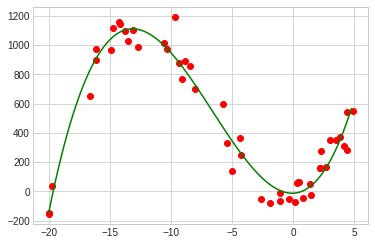

In [34]:
#Creating Dataset and Displaying Poly fit over it
import matplotlib.pyplot as plt
import numpy as np

def round_num(num, places):
    return int(num*(10**places))/(10**places)

noise_scale = 100
number_of_samples = 50
plt.style.use('seaborn-whitegrid')

x_data = 25*(np.random.rand(number_of_samples, 1) - 0.8)
y_data = 5 * x_data + 20 * x_data**2 + 1 * x_data**3 + noise_scale*np.random.randn(number_of_samples, 1)

n_line = 100
x_fit = []
for i in range(0,n_line):
    x_fit.append((i/n_line)*25-20)

coeff = np.polyfit(x_data.flatten(), y_data.flatten(), 3)
print("Best Fit Polynomial \n", round_num(coeff[0], 3), "x^3 +", round_num(coeff[1], 3), "x^2 +", round_num(coeff[2], 3), "x +", round_num(coeff[3], 3))

y_fit = []
fit_func = np.poly1d(coeff)
for i in range(0,n_line):
    y_fit.append(fit_func(x_fit[i]))


plt.plot(x_data,y_data,'ro', x_fit, y_fit, 'g-')
plt.show()

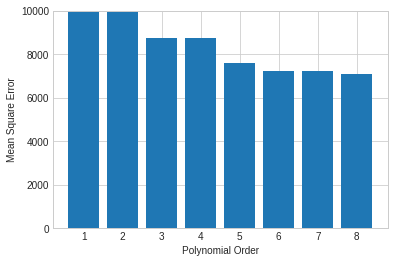

(Y-axis artifically clipped to show smaller variations in higher order)

From MSE, the best fit is of order  8  with a MSE of  7084.546
HOWEVER MSE is not always the singular, golden indicator of a proper model


In [58]:
#Plotting MSE (Mean Square Error) vs polynomial order fit
# MSE = (1/n)sum(Ydata - Yfit)^2


def get_MSEs(x_data, y_data):
    #Function Returns list MSEs for polynomial fit for order 1-8
    x_data = x_data.flatten()
    y_data = y_data.flatten()
    
    if (len(x_data) != len(y_data)):
        print("x_data and y_data did not match length, check data")
        return []
    
    #make best fit coefficient array for each order with poly fit
    coeff_arr = [] #multidimentional array where coefficients for each order are coeff[order-1]
    for i in range(1,9):
        coeff_arr.append(np.polyfit(x_data, y_data, i))

    #generate a function to calculate y-hat for each order for each data point
    poly_func = []
    for i in range(0,8):
        poly_func.append(np.poly1d(coeff_arr[i]))


    
    MSEs = []
    num_samples = len(x_data)
    for i in range(0,8):
        temp_sum = 0
        for j in range(0,num_samples):
            #calculate square difference between data point j and predicted for value for Order i-1
            #and add to temp_sum
            temp_sum += (y_data[j] - poly_func[i](x_data[j]))**2

        MSEs.append(round_num((temp_sum/num_samples), 3))
        
    return MSEs

MSE_arr = get_MSEs(x_data, y_data)
order = [1,2,3,4,5,6,7,8]

plt.bar(order, MSE_arr)
plt.xlabel('Polynomial Order')
plt.ylabel('Mean Square Error')
plt.ylim([0,10000])
plt.show()

min_MSE = min(MSE_arr)
best_order = MSE_arr.index(min_MSE)+1
print('(Y-axis artifically clipped to show smaller variations in higher order)')
print("\nFrom MSE, the best fit is of order ", best_order, " with a MSE of ", min_MSE)
print("HOWEVER MSE is not always the singular, golden indicator of a proper model")
    



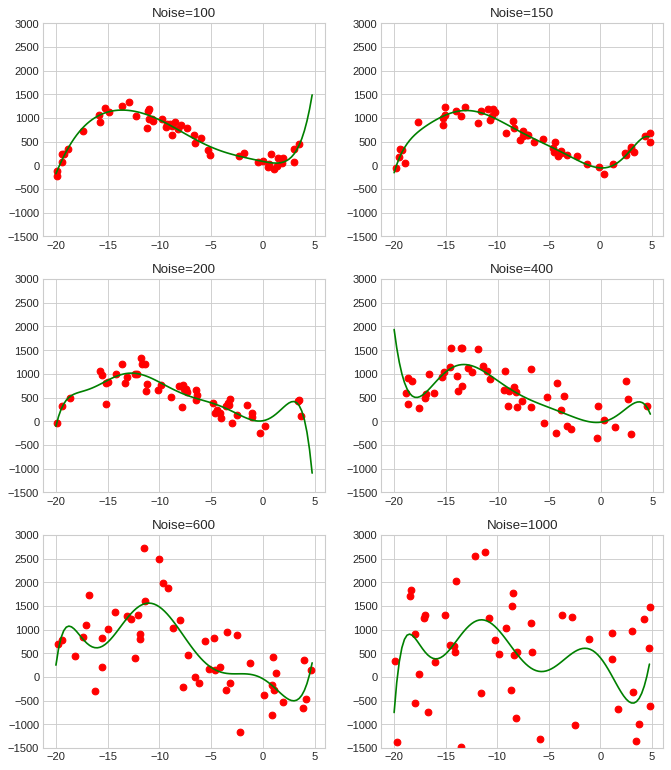

In [74]:
#Analyzing impact of NOISE with order 8 poly fit
Noise = [100, 150, 200, 400, 600, 1000]
number_of_samples = 50
plt.figure(num=None, figsize=(10, 12), dpi=80, facecolor='w')

for n in range(0, len(Noise)):
    noise_scale = Noise[n]

    x_data = 25*(np.random.rand(number_of_samples, 1) - 0.8)
    y_data = 5 * x_data + 20 * x_data**2 + 1 * x_data**3 + noise_scale*np.random.randn(number_of_samples, 1)

    n_line = 100
    x_fit = []
    for i in range(0,n_line):
        x_fit.append((i/n_line)*25-20)

    coeff = np.polyfit(x_data.flatten(), y_data.flatten(), 8)

    y_fit = []
    fit_func = np.poly1d(coeff)
    for i in range(0,n_line):
        y_fit.append(fit_func(x_fit[i]))

    temp = plt.subplot(3,2,(n+1))
    plt.plot(x_data,y_data,'ro', x_fit, y_fit, 'g-')
    plt.ylim([-1500,3000])
    temp.title.set_text("Noise="+str(Noise[n]))
plt.show()

### Impact of Noise Analysis
Noise would very clearly confuse a discriminator designed like this as the model changes drastically as noise is changed. This is most likely because the model is way over-fitted for the data (luckily we know this because of how the data was generated) and therefore it it unable to see under the noise to the underlying polynomial creating the data. Therefore, a polyfit of order 8 would not be correct fot this dataset and would result in many errors if deployed, which is made evident by its wildly varying shape. 

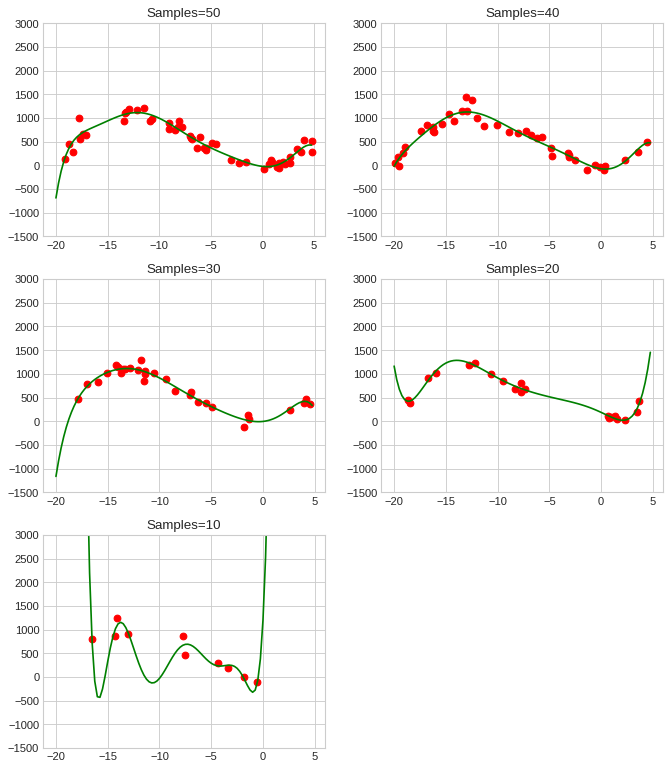

In [72]:
#Analyzing impact of NUMBER OF SAMPLES with order 8 poly fit
noise_scale = 100
num_samples = [50, 40, 30, 20, 10]
plt.figure(num=None, figsize=(10, 12), dpi=80, facecolor='w')

for n in range(0, len(num_samples)):
    number_of_samples = num_samples[n]

    x_data = 25*(np.random.rand(number_of_samples, 1) - 0.8)
    y_data = 5 * x_data + 20 * x_data**2 + 1 * x_data**3 + noise_scale*np.random.randn(number_of_samples, 1)

    n_line = 100
    x_fit = []
    for i in range(0,n_line):
        x_fit.append((i/n_line)*25-20)

    coeff = np.polyfit(x_data.flatten(), y_data.flatten(), 8)

    y_fit = []
    fit_func = np.poly1d(coeff)
    for i in range(0,n_line):
        y_fit.append(fit_func(x_fit[i]))

    temp = plt.subplot(3,2,(n+1))
    plt.plot(x_data,y_data,'ro', x_fit, y_fit, 'g-')
    plt.ylim([-1500,3000])
    temp.title.set_text("Samples="+str(num_samples[n]))
plt.show()

### Impact of Sample Number Analysis
As shown above, like with the noise, the model changes drastically as samply size is decreased, again making order 8 a poor choice. More interestingly, as sample size decreases, the model begins to get worse at both extrapolating _and_ interpolating. When there are only 10 samples, this model can not be trusted, swinging wildly in between points and skrocketing outside of the sample range. This indicates, that the higher the order model, the more data that is required to ensure a good fit. 